# Example notebook for running the SPACE (Scale-Preserving Automatic Concept Extraction) algorithm
This notebook guides you through an example of the SPACE code extracting the most important human-understandable concepts from a convolutional neural network for classifying images of concrete with and without cracks. In addition to that, the notebook of course also can provide a base for running your own SPACE experiments with your own trained neural networks!

## Clone repository
For using the code, you have to clone the SPACE repository at first.

In [1]:
!git clone https://github.com/lkreiskoether/SPACE.git

Cloning into 'SPACE'...
remote: Enumerating objects: 724, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 724 (delta 31), reused 34 (delta 4), pack-reused 632
Receiving objects: 100% (724/724), 54.43 MiB | 33.29 MiB/s, done.
Resolving deltas: 100% (423/423), done.


## Install dependencies
After that, install the dependencies using the requirements.txt file.

In [2]:
!pip install -r /content/SPACE/requirements.txt

     |████████████████████████████████| 13.1 MB 6.8 kB/s 
     |████████████████████████████████| 20.3 MB 56 kB/s 
     |████████████████████████████████| 412.3 MB 18 kB/s 
     |████████████████████████████████| 3.0 MB 38.3 MB/s 
     |████████████████████████████████| 22.3 MB 1.2 MB/s 
     |████████████████████████████████| 503 kB 76.1 MB/s 
     |████████████████████████████████| 50 kB 7.1 MB/s 
     |████████████████████████████████| 3.8 MB 44.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=9f80e424eb08edf87bd91ba739a5b1a781112e42a620800b4c3306c38d943765
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Success

When using a colab notebook, you now have to restart the runtime!

## Set up all needed (image) folders
First, create an experiment folder and in there create one folder for each class of the dataset containing images of the respective class (here we have the two classes "Positive" and "Negative"). The images for this example are taken from [1] and 30 example images of each of the two classes of the dataset were manually added to the notebook as zipped folders before running the next code cell.

[1] 2018 – Özgenel, Ç.F., Gönenç Sorguç, A. “Performance Comparison of Pretrained Convolutional Neural Networks on Crack Detection in Buildings”, ISARC 2018, Berlin.

In [3]:
!mkdir example_experiment

In [1]:
!unzip /content/example_experiment/Positive.zip
!unzip /content/example_experiment/Negative.zip

Archive:  /content/example_experiment/Positive.zip
   creating: Positive/
  inflating: Positive/0.jpg          
  inflating: Positive/1.jpg          
  inflating: Positive/2.jpg          
  inflating: Positive/3.jpg          
  inflating: Positive/4.jpg          
  inflating: Positive/5.jpg          
  inflating: Positive/6.jpg          
  inflating: Positive/7.jpg          
  inflating: Positive/8.jpg          
  inflating: Positive/9.jpg          
  inflating: Positive/10.jpg         
  inflating: Positive/11.jpg         
  inflating: Positive/12.jpg         
  inflating: Positive/13.jpg         
  inflating: Positive/14.jpg         
  inflating: Positive/15.jpg         
  inflating: Positive/16.jpg         
  inflating: Positive/17.jpg         
  inflating: Positive/18.jpg         
  inflating: Positive/19.jpg         
  inflating: Positive/20.jpg         
  inflating: Positive/21.jpg         
  inflating: Positive/22.jpg         
  inflating: Positive/23.jpg         
  inflating: P

## Showing some images of class 1 (the "crack" class)

<Figure size 2160x720 with 0 Axes>

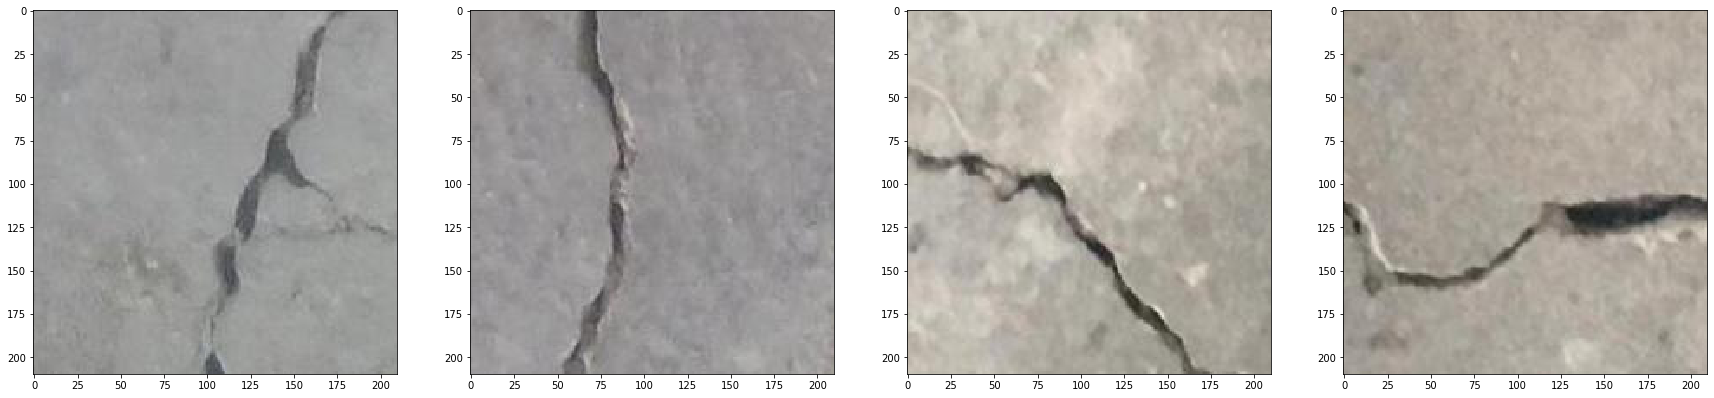

In [2]:
%matplotlib inline               
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img1 = mpimg.imread('/content/example_experiment/Positive/1.jpg')
img2 = mpimg.imread('/content/example_experiment/Positive/2.jpg')
img3 = mpimg.imread('/content/example_experiment/Positive/3.jpg')
img4 = mpimg.imread('/content/example_experiment/Positive/4.jpg')

plt.rcParams['figure.figsize'] = [30, 10]
plt.figure()
f, axarr = plt.subplots(1,4) 

axarr[0].imshow(img1)
axarr[1].imshow(img2)
axarr[2].imshow(img3)
axarr[3].imshow(img4)

## Showing some images of class 0 (the "defect-free" class)

<Figure size 2160x720 with 0 Axes>

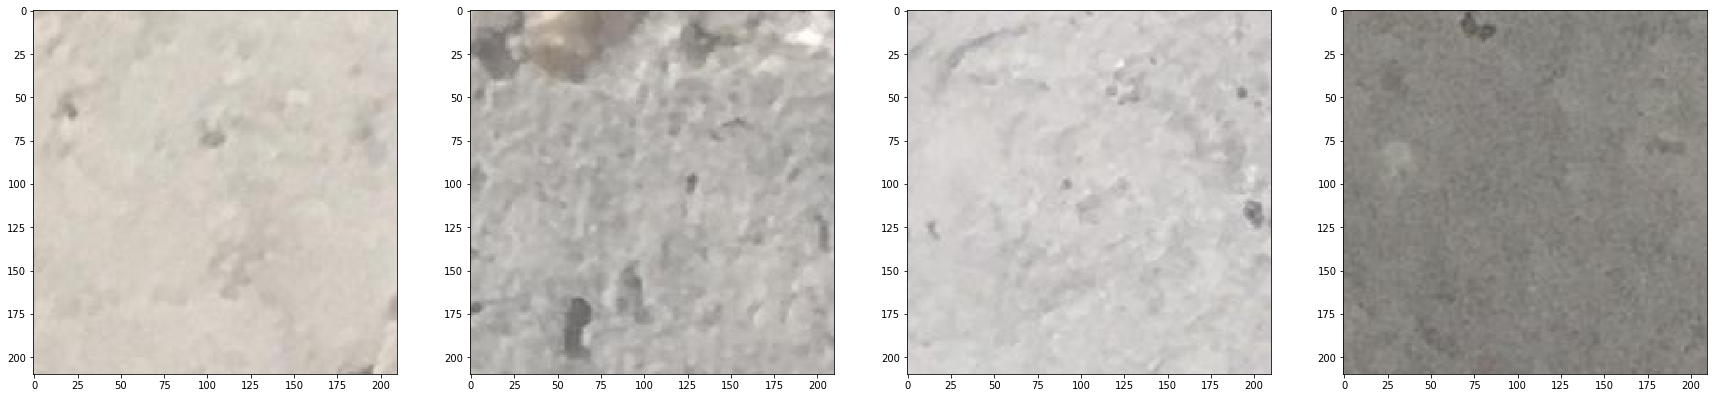

In [3]:
img1 = mpimg.imread('/content/example_experiment/Negative/1.jpg')
img2 = mpimg.imread('/content/example_experiment/Negative/2.jpg')
img3 = mpimg.imread('/content/example_experiment/Negative/3.jpg')
img4 = mpimg.imread('/content/example_experiment/Negative/4.jpg')

plt.rcParams['figure.figsize'] = [30, 10]
plt.figure()
f, axarr = plt.subplots(1,4) 

axarr[0].imshow(img1)
axarr[1].imshow(img2)
axarr[2].imshow(img3)
axarr[3].imshow(img4)

In [4]:
%cd /content/SPACE
import sys, os
sys.path.append(os.getcwd())
%cd /content/example_experiment

/content/SPACE
/content/example_experiment


## Running SPACE
Based on this, we can now run SPACE for finding out which concepts positively influence the neural network's predictions for images of the "crack" class.


Successfully created the directory random500_0 


Successfully created the directory random500_1 
Successfully created the directory random500_2 
Successfully created the directory random500_3 
Successfully created the directory random500_4 
Successfully created the directory random500_5 
Successfully created the directory random500_6 
Successfully created the directory random500_7 
Successfully created the directory random500_8 
Successfully created the directory random500_9 
Successfully created the directory random500_10 
Successfully created the directory random500_11 
Successfully created the directory random500_12 
Successfully created the directory random500_13 
Successfully created the directory random500_14 
Successfully created the directory random500_15 
Successfully created the directory random500_16 
Successfully created the directory random500_17 
Successfully created the directory random500_18 
Successfully created the directory random500_19 
Successfully created the di

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Standardization done!
Explained variation through PCA: 1.000000008731174
Number of clusters:  1
No outliers found!



self.loss:  Tensor("Mean:0", shape=(), dtype=float32)
self.bt:  {'cf/StatefulPartitionedCall/dense/MatMul': <tf.Tensor 'cf/StatefulPartitionedCall/dense/MatMul:0' shape=(?, 512) dtype=float32>}

INFO:tensorflow:cf/StatefulPartitionedCall/dense/MatMul ['concept_0', 'random500_0'] Positive 0.1
INFO:tensorflow:cf/StatefulPartitionedCall/dense/MatMul ['concept_0', 'random500_1'] Positive 0.1
INFO:tensorflow:cf/StatefulPartitionedCall/dense/MatMul ['concept_0', 'random500_2'] Positive 0.1
INFO:tensorflow:cf/StatefulPartitionedCall/dense/MatMul ['concept_0', 'random500_3'] Positive 0.1
INFO:tensorflow:cf/StatefulPartitionedCall/dense/MatMul ['concept_0', 'random500_4'] Positive 0.1
INFO:tensorflow:cf/StatefulPartitionedCall/dense/MatMul ['concept_0', 'random500_5'] Positive 0.1
INFO:tensorflow:cf/StatefulPartitionedCall/dense/MatMul ['concept_0', 'random500_6'] Positive 0.1
I

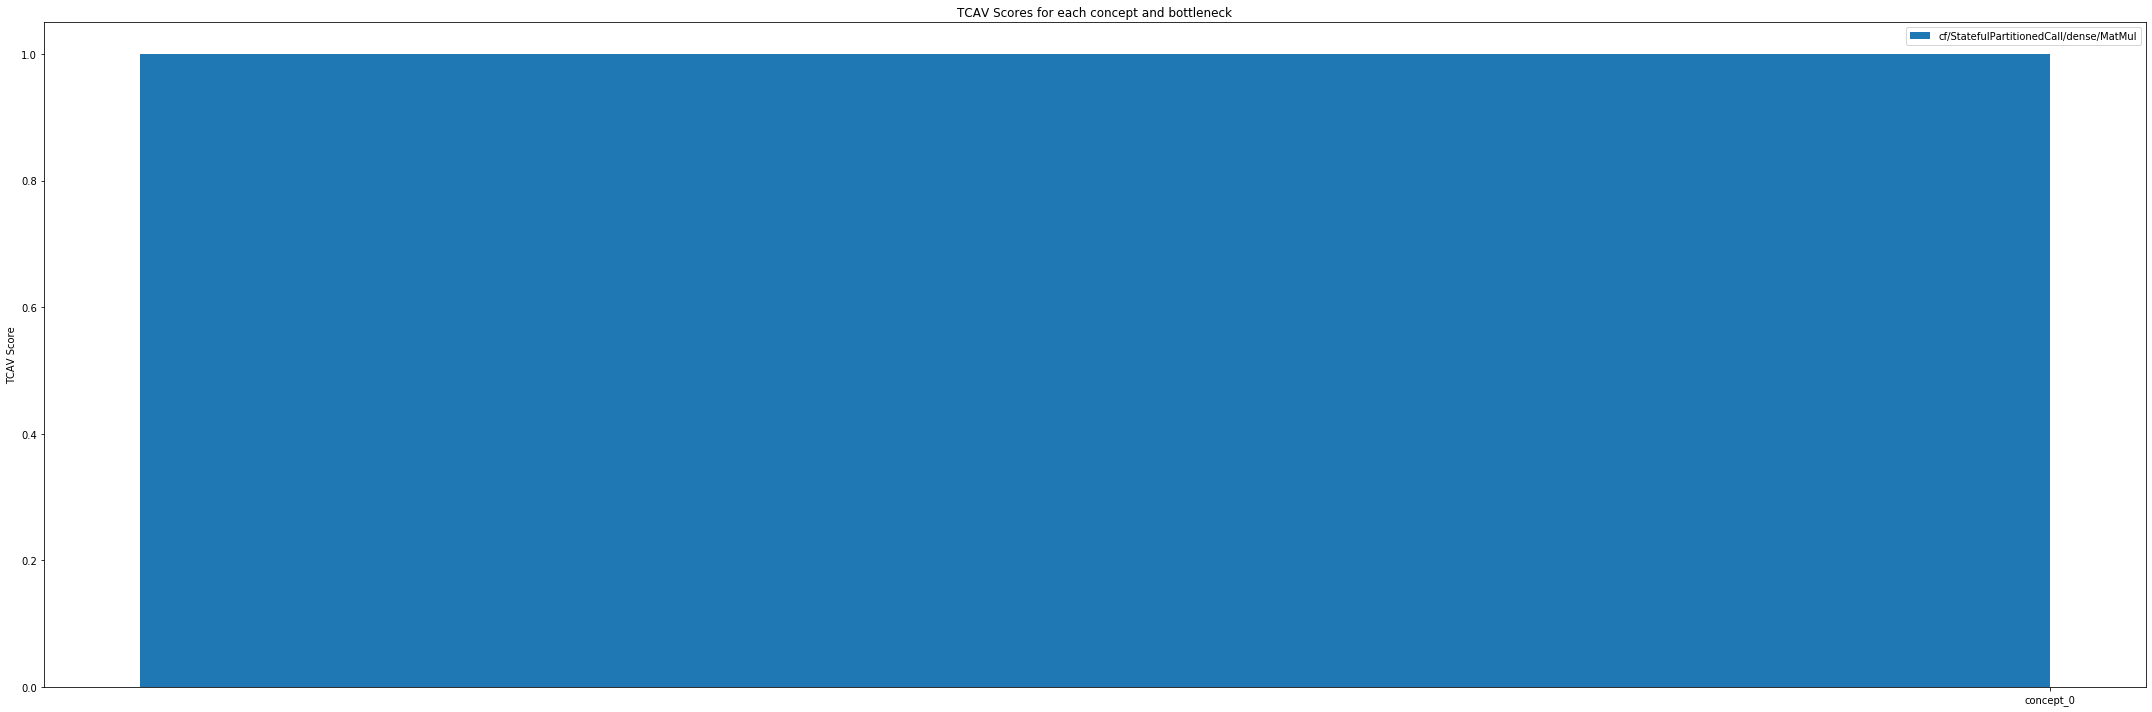

In [5]:
import os

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
from SPACE.random_concept_building import RandomConceptBuilder as rcb
from SPACE.cluster_search import ClusterSearcher as cs
from SPACE.tcav_calculation import TCAVScoreCalculator as tsc

# parameter for randomconceptbuilder
path = '/content/example_experiment/'
folders_for_building = ['Negative']
num_fold = 30
num_imgs_per_fold = 30
store_fmt = 'jpg'
image_shape = [210, 210]
crop_size = [70, 70, 3]  # 56=448/8 --> here analogue to resulting size in cluster search

# parameter for clustersearcher
segments_per_image = 0.1
epsilon_dbscan = 45
min_samples_dbscan = 3
image_shape = image_shape
slices_per_axis = 3
num_classes = 2
model_str = '/content/SPACE/models/concrete_cracks/frozen_graph.pb'
input_tensor = 'x:0'
output_tensor = "cf/StatefulPartitionedCall/dense_1/MatMul:0"
activation_tensor_gradcam = 'cf/StatefulPartitionedCall/vgg16/block5_conv3/Relu:0'
activation_tensor_tcav = 'cf/StatefulPartitionedCall/dense/MatMul:0'
load_format = 'jpg'
store_format = 'jpg'
load_path = '/content/example_experiment/Positive'
store_path = '/content/example_experiment'
cluster_method = 'optics'
distance_metric = 'manhattan'
standardize = True
dim_pca = 30

# parameter for tcavscorecalculator
model_str = model_str
source_dir = store_path
num_random_exps = 10
labels = ['Negative', 'Positive']
target = 'Positive'
concepts = None
image_shape = image_shape
max_examples = 30
scale_mode = 'symm'
resize_mode = 'tiling'
padding_val = None
activation_tensor_tcav_name = 'cf/StatefulPartitionedCall/dense/MatMul'
activation_tensor_tcav_type = 'MatMul'

rcb_exp = rcb(path=path,
                    folders_for_building=folders_for_building,
                    num_fold=num_fold,
                    num_imgs_per_fold=num_imgs_per_fold,
                    store_fmt=store_fmt,
                    image_shape=image_shape,
                    crop_size=crop_size)

# only do this when you need to build random concept images
rcb_exp.build()

cs_exp = cs(segments_per_image=segments_per_image,
                  epsilon_dbscan=epsilon_dbscan,
                  min_samples_dbscan=min_samples_dbscan,
                  image_shape=image_shape,
                  slices_per_axis=slices_per_axis,
                  num_classes=num_classes,
                  model_str=model_str,
                  input_tensor=input_tensor,
                  output_tensor=output_tensor,
                  activation_tensor_gradcam=activation_tensor_gradcam,
                  activation_tensor_tcav=activation_tensor_tcav,
                  load_format=load_format,
                  store_format=store_format,
                  load_path=load_path,
                  store_path=store_path,
                  cluster_method=cluster_method,
                  distance_metric=distance_metric,
                  standardize=standardize,
                  dim_pca=dim_pca)

res_clu = cs_exp.run()

tsc_exp = tsc(model_str=model_str,
                    source_dir=source_dir,
                    num_random_exps=num_random_exps,
                    labels=labels,
                    target=target,
                    concepts=concepts,
                    image_shape=image_shape,
                    max_examples=max_examples,
                    scale_mode=scale_mode,
                    resize_mode=resize_mode,
                    padding_val=padding_val,
                    input_tensor=input_tensor,
                    output_tensor=output_tensor,
                    activation_tensor_tcav=activation_tensor_tcav,
                    activation_tensor_tcav_name=activation_tensor_tcav_name,
                    activation_tensor_tcav_type=activation_tensor_tcav_type)

res_tcav = tsc_exp.run()

Show some examples of the extracted concept for the "crack" class:

<Figure size 2160x720 with 0 Axes>

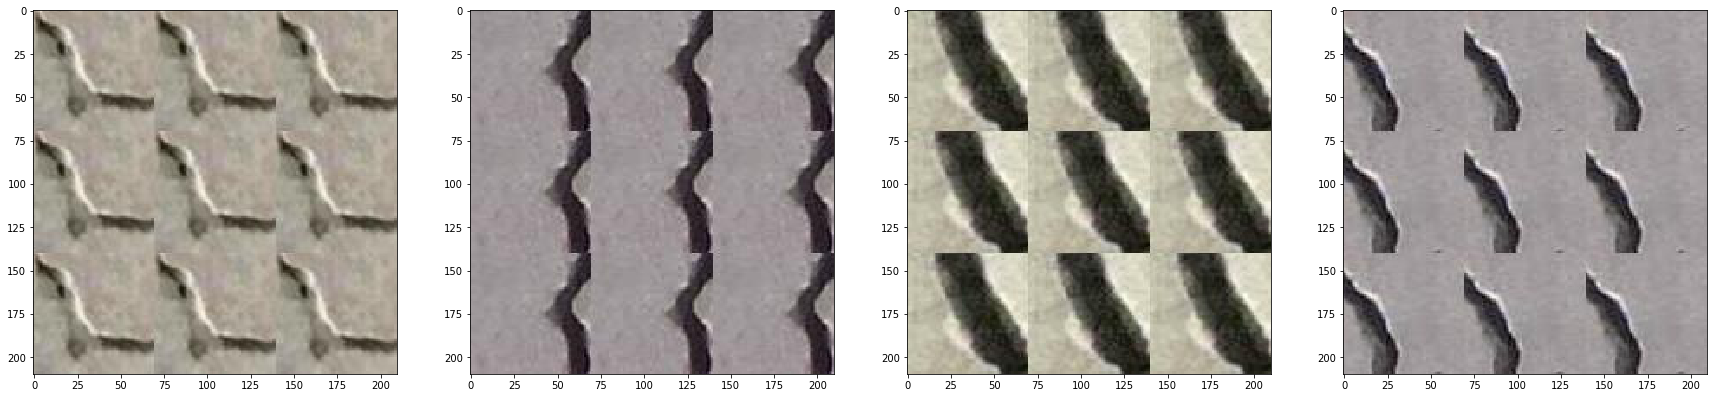

In [6]:
img1 = mpimg.imread('/content/example_experiment/concept_0/img_0.jpg')
img2 = mpimg.imread('/content/example_experiment/concept_0/img_1.jpg')
img3 = mpimg.imread('/content/example_experiment/concept_0/img_2.jpg')
img4 = mpimg.imread('/content/example_experiment/concept_0/img_3.jpg')

plt.rcParams['figure.figsize'] = [30, 10]
plt.figure()
f, axarr = plt.subplots(1,4) 

axarr[0].imshow(img1)
axarr[1].imshow(img2)
axarr[2].imshow(img3)
axarr[3].imshow(img4)